# Compte rendu du TP3
---------
## Intégration Numérique
---------

In [3]:
class RectangleG ( object ) :
    
    def __init__( self , a , b , n , f ) :
        
        self.a = a
        self.b = b
        self.x = np.linspace ( a , b , n+1)
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        
        x= self.x
        y=f ( x )
        h = float ( x [ 1 ] - x [ 0 ] )
        s = sum( y[0 : -1])
        return h * s
    def Graph ( self , f , resolution =1001) :
        
        xl = self.x
        yl = f ( xl )
        xlist_fine =np.linspace ( self.a , self.b , resolution )
        for i in range ( self.n) :
            
            x_rect = [ xl [ i ] , xl [ i ] , xl [ i +1] , xl [ i +1] , xl [ i ] ] # abscisses des sommets
            y_rect = [0 , yl [ i ] , yl [ i ] , 0 , 0 ] # ordonnees des sommets
            plot ( x_rect , y_rect , " r " )
            yflist_fine = f ( xlist_fine )
            plt . plot ( xlist_fine , yflist_fine )
#plt.plot(xl, yl,"bo-")
            plt . xlabel ( ' x ' )
            plt . ylabel ( ' f ( x ) ' )
            plt . title (  'Methode des r e c t angl e s gauches'  )
            text ( 0.5 * ( self.a+self.b ) , f ( self.b ) ,  '$I_n$ =%12.4 f'  % ( self.integrate ( f ) ) , fontsize =15)

# Méthode des rectangles
Dans cette méthode, on calcule l’intégrale numérique en réalisant une somme de surfaces de rectangles. Le domaine d’intégration est découpé en intervalles et on fait comme si la fonction restait constante sur chaque intervalle.

Sur chaque intervalle, on réalise ainsi l’approximation suivante :

                                     integrale de a à b de f(x) ~= (b-a)*f(alpha)

où alpha est une abscisse appartenant à l’intervalle limité par a et b.

Nous nous limiterons ici aux cas où alpha = a ou b, ce qui signifie que pour chaque intervalle nous considérons comme constante la valeur prise par la fonction à l’extrémité gauche ou droite de l’intervalle.

integrale = -0.8708583208502408


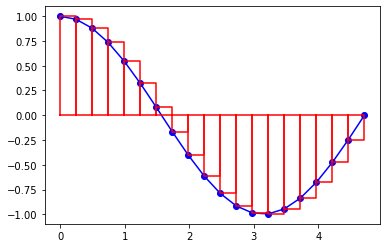

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0
xmax = 3*np.pi/2
nbx = 20
nbi = nbx - 1 # nombre d'intervalles

x = np.linspace(xmin, xmax, nbx)
y = np.cos(x)
plt.plot(x,y,"bo-")

integrale = 0
for i in range(nbi):
    integrale = integrale + y[i]*(x[i+1]-x[i])
    # dessin du rectangle
    x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # abscisses des sommets
    y_rect = [0   , y[i], y[i]  , 0     , 0   ] # ordonnees des sommets
    plt.plot(x_rect, y_rect,"r")
print("integrale =", integrale)

plt.show()

In [7]:
def rectangles(f, a, b, N, side):
   ....:     pas = (b-a) / N
   ....:     x = a
   ....:     somme = 0
   ....:     for _ in range(N):
   ....:         if side:
   ....:             somme += f(x)
   ....:         x += pas
   ....:         if not side:
   ....:             somme += f(x)
   ....:     return somme / N
   ....: 

In [8]:
rectangles(lambda x: x**2, 0, 1, 100, True)


0.3283500000000004

In [9]:
rectangles(lambda x: x**2, 0, 1, 100, False)

0.33835000000000043

# Méthode des trapèzes
Comme son nom l’indique, cette méthode d’intégration utilise une somme de surfaces de trapèzes.

Sur chaque intervalle, on réalise alors l’approximation suivante :

                                   integrale de a à b de f(x) dx ~= (b-a)/2*[f(a)+f(b)]

In [10]:
def trapezes(f, a, b, N):
   ....:     pas = (b-a) / N
   ....:     x = a
   ....:     somme = (f(a) + f(b)) / 2
   ....:     for _ in range(N-1):
   ....:         x += pas
   ....:         somme += f(x)
   ....:     return somme / N

In [11]:
trapezes(lambda x: x**2, 0, 1, 100)

0.3333500000000004

# Méthode de Simpson
Plutôt que d’approximer la courbe par un segment, comme dans les approches précédentes, on peut vouloir utiliser un arc de parabole, c’est-à-dire par une fonction polynomiale d’ordre deux. Ainsi, la méthode de Simpson1 propose d’approcher la fonction f sur l’intervalle [a,b] par une fonction f polynomiale d’ordre deux, qui prend nonseulementles mêmesvaleursque f auxabscisses a etb,comme la méthode du trapèze,mais également à l’abcisse m, correspondant au milieu de l’intervalle [a,b]

Pour obtenir la formule de Simpson, on va réaliser une interpolation avec un polynôme de degré 2. Un polynôme étant une fonction très facile à intégrer, on approche l’intégrale de la fonction f sur l’intervalle [a,b] , par l’intégrale du polynôme sur ce même intervalle.

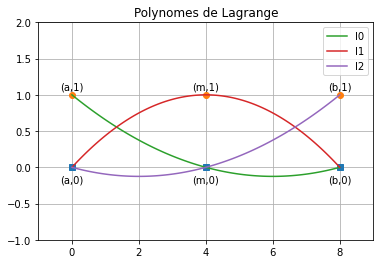

In [12]:
from pylab import *

a = 0
b = 8
m = (a+b)/2

x = linspace(a, b, 101)

l0 = (x-m)/(a-m)*(x-b)/(a-b)
l1 = (x-a)/(m-a)*(x-b)/(m-b)
l2 = (x-a)/(b-a)*(x-m)/(b-m)

plot([a,m,b],zeros(3),"s") # position des valeurs 0
plot([a,m,b],ones(3), "o")  # position des valeurs 1
plot(x,l0, label="l0")
plot(x,l1, label="l1")
plot(x,l2, label="l2")

title("Polynomes de Lagrange")
xlim(-1,9)
ylim(-1,2)
text(a,-0.1,"(a,0)",ha="center",va="top")
text(m,-0.1,"(m,0)",ha="center",va="top")
text(b,-0.1,"(b,0)",ha="center",va="top")
text(a,1.05,"(a,1)",ha="center",va="bottom")
text(m,1.05,"(m,1)",ha="center",va="bottom")
text(b,1.05,"(b,1)",ha="center",va="bottom")
legend()
grid()

show()

Exemple d’interpolation de Lagrange avec un polynôme de degré 2:

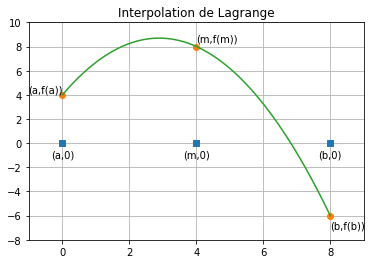

In [13]:
from pylab import *

a = 0
b = 8
m = (a+b)/2
# valeurs de la fonction en a, m, et b
ya = 4
ym = 8
yb = -6

x = linspace(a, b, 101)

l0 = (x-m)/(a-m)*(x-b)/(a-b)
l1 = (x-a)/(m-a)*(x-b)/(m-b)
l2 = (x-a)/(b-a)*(x-m)/(b-m)
P = ya*l0 + ym*l1 + yb*l2

plot([a,m,b],zeros(3),"s") # position des valeurs 0
plot([a,m,b],[ya,ym,yb], "o")  # position des valeurs de f
plot(x,P)

title("Interpolation de Lagrange")
xlim(-1,9)
ylim(-8,10)
text(a,-0.5,"(a,0)",ha="center",va="top")
text(m,-0.5,"(m,0)",ha="center",va="top")
text(b,-0.5,"(b,0)",ha="center",va="top")
text(a,ya+0.05,"(a,f(a))",ha="right",va="bottom")
text(m,ym+0.2,"(m,f(m))",ha="left",va="bottom")
text(b,yb-0.4,"(b,f(b))",ha="left",va="top")
grid()

show()